In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv ('C:\\Sprawozdanie\oceny_studentow.csv')
print (data)

     Unnamed: 0  indeks_studenta  ocena_lab  ocena_wyk
0             0           962560        5.0        3.0
1             1           905220        2.0        4.5
2             2           882698        2.0        3.5
3             3           856084        3.5        2.5
4             4           909337        4.0        5.0
..          ...              ...        ...        ...
493         493           909272        5.0        3.5
494         494           860148        4.0        2.0
495         495           919541        2.0        4.0
496         496           915447        4.5        4.0
497         497           905212        4.0        5.0

[498 rows x 4 columns]


In [11]:
data.loc[(data.ocena_lab<3.0) & (data.ocena_wyk<3.0)]

Unnamed: 0  indeks_studenta  ocena_lab  ocena_wyk
26           26           938108        2.0        2.0
28           28           874626        2.0        2.5
34           34           925845        2.0        2.0
81           81           878908        2.0        2.5
124         124           852473        2.0        2.5
134         134           858660        2.0        2.5
155         155           864907        2.0        2.0
156         156           883340        2.0        2.0
158         158           979602        2.0        2.0
176         176           936719        2.0        2.0
200         200           961417        2.0        2.0
205         205           887697        2.0        2.5
214         214           949177        2.0        2.5
219         219           955335        2.0        2.5
220         220           969671        2.0        2.0
239         239           893957        2.0        2.0
262         262           945248        2.0        2.0
281         281           873654        2.0        2.0
324         324           867620        2.0        2.0
350         350           961940        2.0        2.5
351         351           920986        2.0        2.0
352         352           869791        2.0        2.0
357         357           859561        2.0        2.5
361         361           968119        2.0        2.5
380         380           908826        2.0        2.5
382         382           898598        2.0        2.0
386         386           972335        2.0        2.0
418         418           908950        2.0        2.0
426         426           941765        2.0        2.0
430         430           933587        2.0        2.0
431         431           921298        2.0        2.0
460         460           952151        2.0        2.5
465         465           915300        2.0        2.5
471         471           905082        2.0        2.5
474         474           898977        2.0        2.5

In [12]:
data.loc[(data.ocena_lab>=3.0) & (data.ocena_wyk>=3.0)]
ocena_koncowa=(data.ocena_wyk*0.6)+(data.ocena_lab*0.4)
print (ocena_koncowa)

0      3.8
1      3.5
2      2.9
3      2.9
4      4.6
      ... 
493    4.1
494    2.8
495    3.2
496    4.2
497    4.6
Length: 498, dtype: float64


In [6]:
data['ocena_lab'].mean()

3.4467871485943773

In [7]:
X=data[data['ocena_lab']<3.0]['ocena_lab'].count()+data[data['ocena_wyk']<3.0]['ocena_wyk'].count()-data[(data['ocena_lab']<3.0)&(data['ocena_wyk']<3.0)]['indeks_studenta'].count()
print (X)
print(data[data['ocena_lab']>=2.0]['ocena_lab'].count()-X)                                                                                            

248
250


In [10]:
X=data[data['ocena_lab']<3.0]['ocena_lab'].count()+data[data['ocena_wyk']<3.0]['ocena_wyk'].count()-data[(data['ocena_lab']<3.0)&(data['ocena_wyk']<3.0)]['indeks_studenta'].count()
Y=data[data['ocena_lab']>=2.0]['ocena_lab'].count()-X
idx=['2.0','2.5','3.0','3.5','4.0','4.5','5.0','srednia ocen','ilość osób które zaliczyły(i wykład i laboratoria)','ilość osób które nie zaliczyły (i wykład i laboratoria)']
wyk=pd.Series([data[data['ocena_wyk']==2.0]['ocena_wyk'].count(),data[data['ocena_wyk']==2.5]['ocena_wyk'].count(),
                data[data['ocena_wyk']==3.0]['ocena_wyk'].count(),data[data['ocena_wyk']==3.5]['ocena_wyk'].count(),
                data[data['ocena_wyk']==4.0]['ocena_wyk'].count(),data[data['ocena_wyk']==4.5]['ocena_wyk'].count(),
                data[data['ocena_wyk']==5.0]['ocena_wyk'].count(),data['ocena_wyk'].mean(),X,Y],index=idx)

lab=pd.Series([data[data['ocena_lab']==2.0]['ocena_lab'].count(),data[data['ocena_lab']==2.5]['ocena_lab'].count(),
                data[data['ocena_lab']==3.0]['ocena_lab'].count(),data[data['ocena_lab']==3.5]['ocena_lab'].count(),
                data[data['ocena_lab']==4.0]['ocena_lab'].count(),data[data['ocena_lab']==4.5]['ocena_lab'].count(),
                data[data['ocena_lab']==5.0]['ocena_lab'].count(),data['ocena_lab'].mean(),X,Y],index=idx)
df=pd.DataFrame([wyk,lab],index=['wykłady',"laboratoria"])
df.to_csv("Podsumowanie.csv")

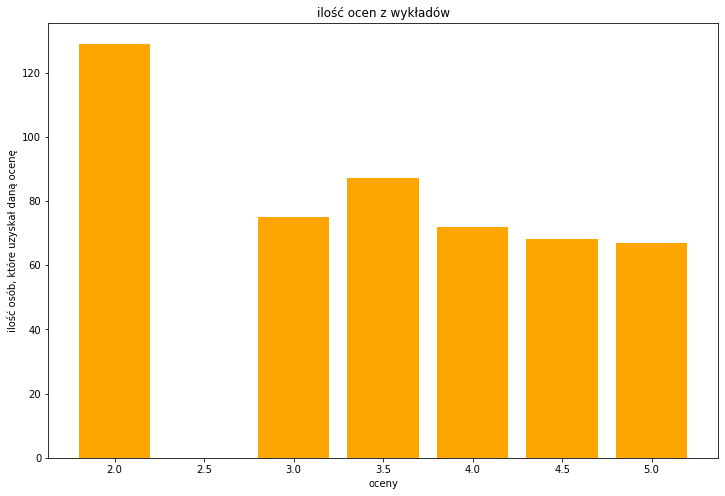

In [16]:
labels=[2.0,2.5,3.0,3.5,4.0,4.5,5.0]
height = [data[data['ocena_lab']==2.0]['ocena_lab'].count(),data[data['ocena_lab']==2.5]['ocena_lab'].count(),
         data[data['ocena_lab']==3.0]['ocena_lab'].count(),data[data['ocena_lab']==3.5]['ocena_lab'].count(),
         data[data['ocena_lab']==4.0]['ocena_lab'].count(),data[data['ocena_lab']==4.5]['ocena_lab'].count(),
         data[data['ocena_lab']==5.0]['ocena_lab'].count()]
position=np.arange(len(height))
plt.figure(figsize=(12,8))
plt.bar(position,height,color='orange')
plt.xticks(position,labels)
plt.xlabel('oceny')
plt.ylabel('ilość osób, które uzyskał daną ocenę')
plt.title('ilość ocen z wykładów')
plt.show()

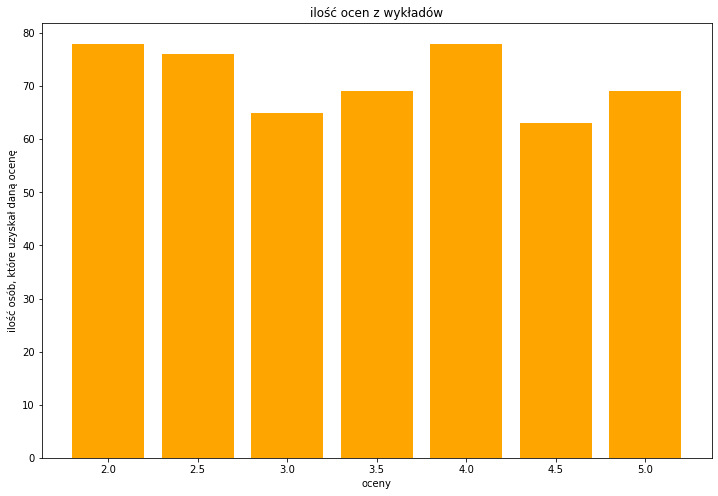

In [15]:
labels=[2.0,2.5,3.0,3.5,4.0,4.5,5.0]
height = [data[data['ocena_wyk']==2.0]['ocena_wyk'].count(),data[data['ocena_wyk']==2.5]['ocena_wyk'].count(),
         data[data['ocena_wyk']==3.0]['ocena_wyk'].count(),data[data['ocena_wyk']==3.5]['ocena_wyk'].count(),
         data[data['ocena_wyk']==4.0]['ocena_wyk'].count(),data[data['ocena_wyk']==4.5]['ocena_wyk'].count(),
         data[data['ocena_wyk']==5.0]['ocena_wyk'].count()]
position=np.arange(len(height))
plt.figure(figsize=(12,8))
plt.bar(position,height,color='orange')
plt.xticks(position,labels)
plt.xlabel('oceny')
plt.ylabel('ilość osób, które uzyskał daną ocenę')
plt.title('ilość ocen z wykładów')
plt.show()